In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/digit-recog/


/content/drive/My Drive/digit-recog


In [3]:
#File management

!pip install ipython-autotime
%load_ext autotime

from IPython.display import clear_output


time: 164 µs


In [4]:
#Import lib

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Input,GlobalAveragePooling2D, Lambda
from keras.layers.experimental.preprocessing import Resizing
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import keras.backend as k
from tensorflow.image import grayscale_to_rgb, resize


time: 2.18 s


Number of train image: 42000
Number of test image: 28000
Image size: (28,28)
Null in train set status: False
Null in test set status: False
----Before reshape----
Xtrain shape:(42000, 784)
Xtest shape:(28000, 784)
---------------------
----After reshape----
Xtrain shape:(42000, 28, 28, 1)
Xtest shape:(28000, 28, 28, 1)
0    1
Name: label, dtype: int64
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


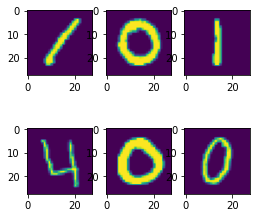

Number of train data: 37800
Number of validate data: 4200
time: 8.95 s


In [5]:
#Data prep

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

y_train = train['label']

X_train = train.drop(labels = ['label'],axis = 1)
X_test = test

del train
del test

X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape = X_test.shape

nbr_train = X_train_shape[0]
nbr_pixel = X_train_shape[1]
img_size = int(np.sqrt(nbr_pixel))
nbr_test = X_test_shape[0]

print('Number of train image: '+ str(nbr_train))
print('Number of test image: '+ str(nbr_test))
print('Image size: (' + str(img_size) + ',' + str(img_size) + ')')

train_any_null = X_train.isnull().any().any()
test_any_null = X_test.isnull().any().any()

print('Null in train set status: ' + str(train_any_null))
print('Null in test set status: ' + str(test_any_null))

X_train = X_train / 255.0
X_test = X_test / 255.0

print('----Before reshape----')
print('Xtrain shape:' + str(X_train.shape))
print('Xtest shape:' + str(X_test.shape))
print('---------------------')

X_train = X_train.values.reshape(-1,img_size,img_size,1)
X_test = X_test.values.reshape(-1,img_size,img_size,1)

print('----After reshape----')
print('Xtrain shape:' + str(X_train.shape))
print('Xtest shape:' + str(X_test.shape))

print(y_train[0:1])
y_train = to_categorical(y_train, num_classes = 10)
print(y_train[0:1,:])

fig = plt.figure(figsize=(4,4))

for i in range(6):
    fig.add_subplot(2,3,i+1)
    plt.imshow(X_train[i,:,:,0])
    
plt.show()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 2)
print('Number of train data: ' + str(X_train.shape[0]))
print('Number of validate data: ' + str(X_val.shape[0]))

In [6]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.08, # Randomly zoom image 
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        shear_range=0.3,
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

time: 64.7 ms


In [7]:
#Model 1

model_1 = Sequential()

model_1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model_1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_1.add(MaxPool2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))


model_1.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_1.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_1.add(Dropout(0.25))


model_1.add(Flatten())
model_1.add(Dense(256, activation = "relu"))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation = "softmax"))

optimizer = Adam(learning_rate=0.001)

model_1.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

model_1.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [8]:
#Model 2

model_2= Sequential()

model_2.add(Conv2D(input_shape=(28,28,1), filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.10))

model_2.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size=(2,2)))
model_2.add(Dropout(0.10))

model_2.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model_2.add(BatchNormalization())

model_2.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.25))

model_2.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model_2.add(BatchNormalization())



model_2.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))




model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.25))

model_2.add(Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)

model_2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)       

In [9]:
#Here is to create and compile model 3
model_3 = Sequential()

model_3.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model_3.add(BatchNormalization())

model_3.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model_3.add(BatchNormalization())

model_3.add(MaxPool2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_3.add(BatchNormalization())

model_3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',  activation ='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(256, activation = "relu"))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.25))

model_3.add(Dense(10, activation = "softmax"))

optimizer = Adam(learning_rate=0.001)

model_3.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)        102464    
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)       

In [10]:
# model checkpoint

mc_1 = ModelCheckpoint('best_model_1.h5', monitor='val_loss', mode='min', save_best_only= True, verbose=1)
mc_2 = ModelCheckpoint('best_model_2.h5', monitor='val_loss', mode='min', save_best_only= True, verbose=1)
mc_3 = ModelCheckpoint('best_model_3.h5', monitor='val_loss', mode='min', save_best_only= True, verbose=1)

time: 2.35 ms


In [ ]:
model_1.load_weights('last_model_1.h5')
model_2.load_weights('last_model_2.h5')
model_3.load_weights('last_model_3.h5')

time: 3.93 s


In [11]:
#train model 1


learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.8, 
                                            min_lr=0.00001)

epochs = 40
batch_size = 16
step_per_epoch = X_train.shape[0] // batch_size
history_1 = model_1.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (X_val,y_val), steps_per_epoch=step_per_epoch, callbacks=[learning_rate_reduction, mc_1])
model_1.save("last_model_1.h5")

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
2358/2362 [============================>.] - ETA: 0s - loss: 0.2864 - accuracy: 0.9104
Epoch 00001: val_loss improved from inf to 0.06994, saving model to best_model_1.h5
2362/2362 [==============================] - 30s 13ms/step - loss: 0.2862 - accuracy: 0.9105 - val_loss: 0.0699 - val_accuracy: 0.9800
Epoch 2/40
2361/2362 [============================>.] - ETA: 0s - loss: 0.1176 - accuracy: 0.9653
Epoch 00002: val_loss improved from 0.06994 to 0.04172, saving model to best_model_1.h5
2362/2362 [==============================] - 28s 12ms/step - loss: 0.1176 - accuracy: 0.9653 - val_loss: 0.0417 - val_accuracy: 0.9879
Epoch 3/40
2361/2362 [============================>.] - ETA: 0s - loss: 0.0896 - accuracy: 0.9730
Epoch 00003: val_loss improved from 0.04172 to 0.03028, saving model to best_model_1.h5
2362/2362 [==============================] - 29s 12ms/step - loss: 0.0896 - accuracy: 0.9730 - val_l

In [12]:
#train model 2


learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.8, 
                                            min_lr=0.00001)

epochs = 40
batch_size = 16
step_per_epoch = X_train.shape[0] // batch_size
history_2 = model_2.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (X_val,y_val), steps_per_epoch=step_per_epoch, callbacks=[learning_rate_reduction, mc_2])
model_2.save("last_model_2.h5")

Epoch 1/40
2361/2362 [============================>.] - ETA: 0s - loss: 0.2683 - accuracy: 0.9176
Epoch 00001: val_loss improved from inf to 0.06471, saving model to best_model_2.h5
2362/2362 [==============================] - 32s 14ms/step - loss: 0.2682 - accuracy: 0.9176 - val_loss: 0.0647 - val_accuracy: 0.9802
Epoch 2/40
2359/2362 [============================>.] - ETA: 0s - loss: 0.1090 - accuracy: 0.9680
Epoch 00002: val_loss did not improve from 0.06471
2362/2362 [==============================] - 32s 13ms/step - loss: 0.1090 - accuracy: 0.9680 - val_loss: 0.0745 - val_accuracy: 0.9779
Epoch 3/40
2359/2362 [============================>.] - ETA: 0s - loss: 0.0865 - accuracy: 0.9742
Epoch 00003: val_loss improved from 0.06471 to 0.05757, saving model to best_model_2.h5
2362/2362 [==============================] - 32s 14ms/step - loss: 0.0865 - accuracy: 0.9742 - val_loss: 0.0576 - val_accuracy: 0.9852
Epoch 4/40
2360/2362 [============================>.] - ETA: 0s - loss: 0.0748

In [13]:
#train model 3


learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.8, 
                                            min_lr=0.00001)

epochs = 40
batch_size = 16
step_per_epoch = X_train.shape[0] // batch_size
history_3 = model_3.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (X_val,y_val), steps_per_epoch=step_per_epoch, callbacks=[learning_rate_reduction, mc_3])
model_3.save("last_model_3.h5")

Epoch 1/40
2360/2362 [============================>.] - ETA: 0s - loss: 0.2581 - accuracy: 0.9201
Epoch 00001: val_loss improved from inf to 0.04430, saving model to best_model_3.h5
2362/2362 [==============================] - 35s 15ms/step - loss: 0.2581 - accuracy: 0.9200 - val_loss: 0.0443 - val_accuracy: 0.9857
Epoch 2/40
2362/2362 [==============================] - ETA: 0s - loss: 0.1205 - accuracy: 0.9646
Epoch 00002: val_loss improved from 0.04430 to 0.04183, saving model to best_model_3.h5
2362/2362 [==============================] - 32s 14ms/step - loss: 0.1205 - accuracy: 0.9646 - val_loss: 0.0418 - val_accuracy: 0.9869
Epoch 3/40
2359/2362 [============================>.] - ETA: 0s - loss: 0.0891 - accuracy: 0.9719
Epoch 00003: val_loss improved from 0.04183 to 0.03970, saving model to best_model_3.h5
2362/2362 [==============================] - 32s 14ms/step - loss: 0.0890 - accuracy: 0.9719 - val_loss: 0.0397 - val_accuracy: 0.9886
Epoch 4/40
2361/2362 [===================

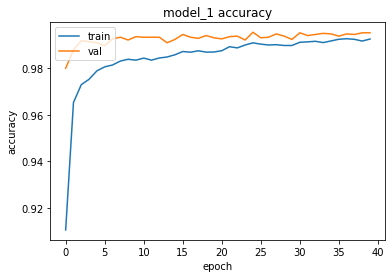

time: 204 ms


In [14]:
#plot model acc 1

plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model_1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

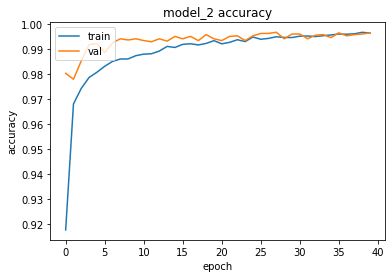

time: 214 ms


In [15]:
#plot model acc 2

plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model_2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

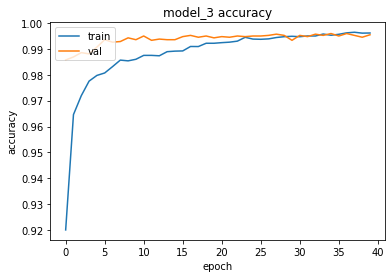

time: 235 ms


In [16]:
#plot model acc 3

plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model_3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
#function to vote the result

def lets_vote(ans_1,ans_2,ans_3):

  list_ans = [ans_1,ans_2,ans_3]

  counter = 0
  num = list_ans[0] 

  for i in list_ans: 
        curr_frequency = list_ans.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 

  return num

time: 5.79 ms


In [21]:
#predict model 1 2 3

# model_1.load_weights('last_model_1.h5')
# model_2.load_weights('last_model_2.h5')
# model_3.load_weights('last_model_3.h5')

model_1.load_weights('best_model_1.h5')
model_2.load_weights('best_model_2.h5')
model_3.load_weights('best_model_3.h5')

result = model_1.predict(X_test)
result_1 = np.argmax(result,axis=1)
# result_1 = pd.Series(result_1,name='Label')

result = model_2.predict(X_test)
result_2 = np.argmax(result,axis=1)
# # result_2 = pd.Series(result_2,name='Label')

result = model_3.predict(X_test)
result_3 = np.argmax(result,axis=1)
# # result_3 = pd.Series(result_3,name='Label')

time: 10.4 s


In [22]:
ans = list()
for i in range(nbr_test):
  ans_1 = result_1[i]
  ans_2 = result_2[i]
  ans_3 = result_3[i]

  voted_ans = lets_vote(ans_2,ans_1,ans_3)
  ans.append(voted_ans)
ans = np.array(ans)
if len(ans) != nbr_test:
  print('Something WRONG!!!')
results = pd.Series(ans,name='Label')

time: 64 ms


In [23]:
#create submission

submission = pd.concat([pd.Series(range(1,nbr_test+1),name = "ImageId"),results],axis = 1)
submission.to_csv("submission.csv",index=False)

time: 50.4 ms


In [ ]:
# model_1.save("best_model_1.h5")
# model_2.save("best_model_2.h5")
# model_3.save("best_model_3.h5")

time: 1.7 s


In [ ]:
# files.download("submission.csv")
# files.download("best_model_1.h5")
# files.download("best_model_2.h5")
# files.download("best_model_3.h5")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

time: 15.7 ms
